# Understanding Retail Consumers

<img src="images/customer.jpg"/>

In Unit 6, we saw how clustering can be used for *market segmentation*, the idea of dividing airline passengers into small, more similar groups, and then designing a marketing strategy specifically for each group.  In this problem, we'll see how this idea can be applied to retail consumer data.

In this problem, we'll use the dataset Households.csv, which contains data collected over two years for a group of 2,500 households.  Each row (observation) in our dataset represents a unique household.  The dataset contains the following variables:

    NumVisits = the number of times the household visited the retailer 

    AvgProdCount = the average number of products purchased per transaction

    AvgDiscount = the average discount per transaction from coupon usage (in %) - NOTE: Do not divide this value by 100!

    AvgSalesValue = the average sales value per transaction

    MorningPct = the percentage of visits in the morning (8am - 1:59pm)

    AfternoonPct = the percentage of visits in the afternoon (2pm - 7:59pm)
    
Note that some visits can occur outside of morning and afternoon hours.  That is, visits from 8pm - 7:59am are possible.

This dataset was derived from source files provided by dunnhumby, a customer science company based in the United Kingdom.

### Problem 1 - Reading in the data
Read the dataset *Households.csv* into R.

In [1]:
# Load the Dataset

Households = read.csv("data/Households2.csv")

head(Households)

,NumVisits,AvgProdCount,AvgDiscount,AvgSalesValue,MorningPct,AfternoonPct
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,86,20.08140,8.105116,50.35070,46.511628,51.16279
2,45,15.86667,7.444222,43.42978,8.888889,60.00000
3,47,19.61702,14.365106,56.45128,14.893617,76.59574
4,30,10.03333,3.855000,40.00367,13.333333,56.66667
5,40,5.55000,2.958250,19.47650,2.500000,67.50000
6,250,7.16400,3.313360,23.98464,25.600000,61.20000


In [2]:
str(Households)

'data.frame':	2500 obs. of  6 variables:
 $ NumVisits    : int  86 45 47 30 40 250 59 113 20 9 ...
 $ AvgProdCount : num  20.08 15.87 19.62 10.03 5.55 ...
 $ AvgDiscount  : num  8.11 7.44 14.37 3.85 2.96 ...
 $ AvgSalesValue: num  50.4 43.4 56.5 40 19.5 ...
 $ MorningPct   : num  46.51 8.89 14.89 13.33 2.5 ...
 $ AfternoonPct : num  51.2 60 76.6 56.7 67.5 ...


In [3]:
summary(Households)

   NumVisits       AvgProdCount     AvgDiscount     AvgSalesValue    
 Min.   :   1.0   Min.   : 1.186   Min.   : 0.089   Min.   :  2.388  
 1st Qu.:  39.0   1st Qu.: 6.123   1st Qu.: 3.006   1st Qu.: 18.329  
 Median :  79.0   Median : 8.979   Median : 4.865   Median : 27.417  
 Mean   : 110.6   Mean   :10.291   Mean   : 5.713   Mean   : 31.621  
 3rd Qu.: 142.2   3rd Qu.:13.116   3rd Qu.: 7.327   3rd Qu.: 40.546  
 Max.   :1300.0   Max.   :56.600   Max.   :47.176   Max.   :165.829  
   MorningPct      AfternoonPct   
 Min.   :  0.00   Min.   :  0.00  
 1st Qu.: 16.67   1st Qu.: 42.20  
 Median : 26.09   Median : 52.00  
 Mean   : 28.73   Mean   : 51.45  
 3rd Qu.: 37.17   3rd Qu.: 61.29  
 Max.   :100.00   Max.   :100.00  

**How many households have logged transactions at the retailer only in the morning?**

In [4]:
nrow(subset(Households, MorningPct == 100.0))

[1] 4

**How many households have logged transactions at the retailer only in the afternoon?**

In [5]:
nrow(subset(Households, AfternoonPct == 100.0))

[1] 13

### Problem 2 - Descriptive statistics
**Of the households that spend more than $150 per transaction on average, what is the minimum average discount per transaction?**

In [6]:
houseup150 = subset(Households, AvgSalesValue > 150)
houseup150

,NumVisits,AvgProdCount,AvgDiscount,AvgSalesValue,MorningPct,AfternoonPct
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
973,84,42.66667,18.49893,160.5514,3.571429,36.904762
1899,69,46.92754,27.18406,163.4319,92.753623,7.246377
1900,56,38.55357,15.64607,152.5204,66.071429,33.928571
2042,29,37.82759,29.94897,165.8293,10.344828,72.413793


In [7]:
summary(houseup150)

   NumVisits      AvgProdCount    AvgDiscount    AvgSalesValue  
 Min.   :29.00   Min.   :37.83   Min.   :15.65   Min.   :152.5  
 1st Qu.:49.25   1st Qu.:38.37   1st Qu.:17.79   1st Qu.:158.5  
 Median :62.50   Median :40.61   Median :22.84   Median :162.0  
 Mean   :59.50   Mean   :41.49   Mean   :22.82   Mean   :160.6  
 3rd Qu.:72.75   3rd Qu.:43.73   3rd Qu.:27.88   3rd Qu.:164.0  
 Max.   :84.00   Max.   :46.93   Max.   :29.95   Max.   :165.8  
   MorningPct      AfternoonPct   
 Min.   : 3.571   Min.   : 7.246  
 1st Qu.: 8.651   1st Qu.:27.258  
 Median :38.208   Median :35.417  
 Mean   :43.185   Mean   :37.623  
 3rd Qu.:72.742   3rd Qu.:45.782  
 Max.   :92.754   Max.   :72.414  

In [8]:
min(houseup150$AvgDiscount)

[1] 15.64607

Answer: **15,65%**

**Of the households who have an average discount per transaction greater than 25%, what is the minimum average sales value per transaction?**

In [9]:
houseup25 = subset(Households, AvgDiscount > 25)
houseup25

,NumVisits,AvgProdCount,AvgDiscount,AvgSalesValue,MorningPct,AfternoonPct
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
60,8,13.37500,27.04625,50.11750,25.00000,62.500000
248,57,36.43860,35.05246,105.94754,28.07018,42.105263
1238,51,35.03922,26.74765,91.73745,58.82353,35.294118
1315,5,56.60000,26.76000,129.07200,20.00000,60.000000
1574,28,42.10714,47.17607,129.14393,50.00000,46.428571
1899,69,46.92754,27.18406,163.43188,92.75362,7.246377
2026,18,22.27778,36.33611,65.64611,11.11111,22.222222
2042,29,37.82759,29.94897,165.82931,10.34483,72.413793
2409,8,47.25000,36.69000,113.31875,0.00000,87.500000


In [10]:
min(houseup25$AvgSalesValue)

[1] 50.1175

Answer: 50.

**In the dataset, what proportion of households visited the retailer at least 300 times?**

In [11]:
nrow(subset(Households, NumVisits >= 300)) / nrow(Households)

[1] 0.0592

Answer: **5.92%**.

### Problem 3 - Importance of Normalizing
When clustering data, it is often important to normalize the variables so that they are all on the same scale. If you clustered this dataset without normalizing, **which variable would you expect to dominate in the distance calculations?**

In [12]:
summary(Households)

   NumVisits       AvgProdCount     AvgDiscount     AvgSalesValue    
 Min.   :   1.0   Min.   : 1.186   Min.   : 0.089   Min.   :  2.388  
 1st Qu.:  39.0   1st Qu.: 6.123   1st Qu.: 3.006   1st Qu.: 18.329  
 Median :  79.0   Median : 8.979   Median : 4.865   Median : 27.417  
 Mean   : 110.6   Mean   :10.291   Mean   : 5.713   Mean   : 31.621  
 3rd Qu.: 142.2   3rd Qu.:13.116   3rd Qu.: 7.327   3rd Qu.: 40.546  
 Max.   :1300.0   Max.   :56.600   Max.   :47.176   Max.   :165.829  
   MorningPct      AfternoonPct   
 Min.   :  0.00   Min.   :  0.00  
 1st Qu.: 16.67   1st Qu.: 42.20  
 Median : 26.09   Median : 52.00  
 Mean   : 28.73   Mean   : 51.45  
 3rd Qu.: 37.17   3rd Qu.: 61.29  
 Max.   :100.00   Max.   :100.00  

Answer: AvgSalesValue.

### Problem 4 - Normalizing the Data
Normalize all of the variables in the HouseHolds dataset by entering the following commands in your R console: (Note that these commands assume that your dataset is called "Households", and create the normalized dataset "HouseholdsNorm". You can change the names to anything you want by editing the commands.)

    library(caret)

    preproc = preProcess(Households)

    HouseholdsNorm = predict(preproc, Households)

(Remember that for each variable, the normalization process subtracts the mean and divides by the standard deviation. We learned how to do this in Unit 6.) In your normalized dataset, all of the variables should have mean 0 and standard deviation 1.

In [13]:
library(caret)

Loading required package: lattice

Loading required package: ggplot2



In [14]:
preproc = preProcess(Households)

HouseholdsNorm = predict(preproc, Households)

In [15]:
summary(HouseholdsNorm)

   NumVisits        AvgProdCount      AvgDiscount      AvgSalesValue    
 Min.   :-0.9475   Min.   :-1.5239   Min.   :-1.4010   Min.   :-1.5342  
 1st Qu.:-0.6190   1st Qu.:-0.6976   1st Qu.:-0.6743   1st Qu.:-0.6976  
 Median :-0.2731   Median :-0.2197   Median :-0.2112   Median :-0.2206  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.2737   3rd Qu.: 0.4728   3rd Qu.: 0.4021   3rd Qu.: 0.4684  
 Max.   :10.2828   Max.   : 7.7500   Max.   :10.3293   Max.   : 7.0432  
   MorningPct       AfternoonPct     
 Min.   :-1.6779   Min.   :-3.22843  
 1st Qu.:-0.7047   1st Qu.:-0.58006  
 Median :-0.1546   Median : 0.03458  
 Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.4926   3rd Qu.: 0.61755  
 Max.   : 4.1617   Max.   : 3.04658  

**What is the maximum value of NumVisits in the normalized dataset?**

Answer: 10.2828.

**What is the minimum value of AfternoonPct in the normalized dataset?**

Answer: -3.22843.

Run the following code to create a dendrogram of your data:

    set.seed(200) 

    distances <- dist(HouseholdsNorm, method = "euclidean") 

    ClusterShoppers <- hclust(distances, method = "ward.D") 

    plot(ClusterShoppers, labels = FALSE)

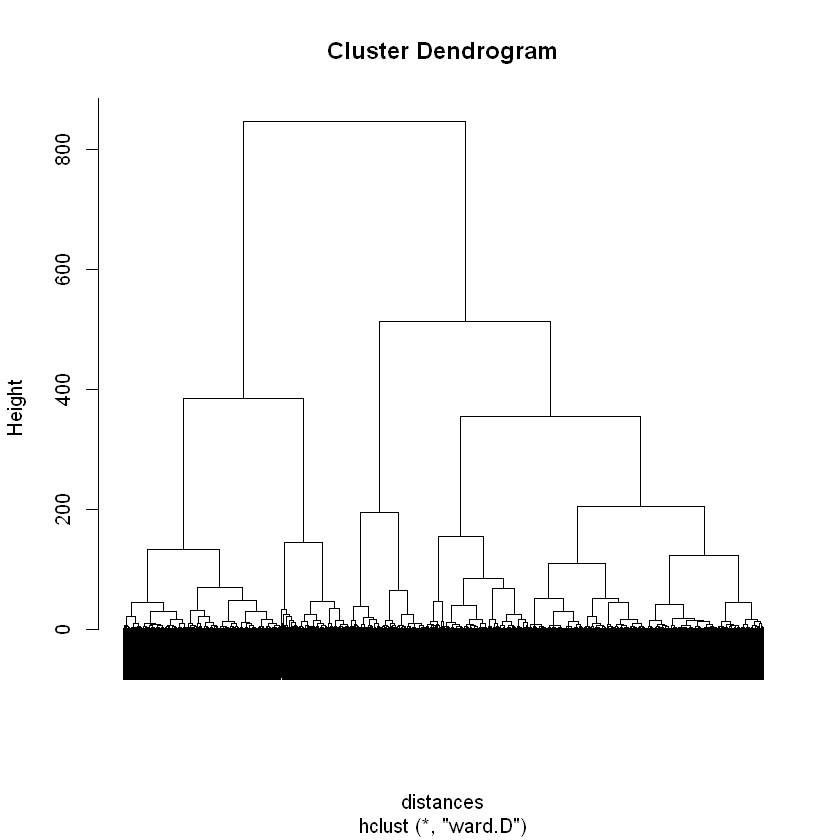

In [16]:
set.seed(200)

distances <- dist(HouseholdsNorm, method='euclidean')

ClusterShoppers <- hclust(distances, method='ward.D')

plot(ClusterShoppers, labels=F)

### Problem 5 - Interpreting the Dendrogram
**Based on the dendrogram, how many clusters do you think would be appropriate for this problem?**

Answer: 5.

### Problem 6 - K-means Clustering
Run the k-means clustering algorithm on your normalized dataset, selecting 10 clusters. 

Right before using the kmeans function, type "set.seed(200)" in your R console.

In [17]:
set.seed(200)

KMC = kmeans(HouseholdsNorm, centers = 10)

str(KMC)

List of 9
 $ cluster     : int [1:2500] 3 8 7 8 2 2 7 5 5 2 ...
 $ centers     : num [1:10, 1:6] -0.1402 -0.172 0.0071 2.8401 -0.1558 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:10] "1" "2" "3" "4" ...
  .. ..$ : chr [1:6] "NumVisits" "AvgProdCount" "AvgDiscount" "AvgSalesValue" ...
 $ totss       : num 14994
 $ withinss    : num [1:10] 511 546 445 670 649 ...
 $ tot.withinss: num 4870
 $ betweenss   : num 10124
 $ size        : int [1:10] 420 431 140 154 442 277 214 238 133 51
 $ iter        : int 5
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [18]:
summary(KMC)

             Length Class  Mode   
cluster      2500   -none- numeric
centers        60   -none- numeric
totss           1   -none- numeric
withinss       10   -none- numeric
tot.withinss    1   -none- numeric
betweenss       1   -none- numeric
size           10   -none- numeric
iter            1   -none- numeric
ifault          1   -none- numeric

In [19]:
table(KMC$cluster)


  1   2   3   4   5   6   7   8   9  10 
420 431 140 154 442 277 214 238 133  51 

**How many observations are in the smallest cluster?**

In [20]:
min(table(KMC$cluster))

[1] 51

**How many observations are in the largest cluster?**

In [21]:
max(table(KMC$cluster))

[1] 442

### Problem 7 - Understanding the Clusters
Now, use the cluster assignments from k-means clustering together with the cluster centroids to answer the next few questions.

In [22]:
KMC$centers

,NumVisits,AvgProdCount,AvgDiscount,AvgSalesValue,MorningPct,AfternoonPct
1,-0.1401843,-0.5309093,-0.4525582,-0.4841898,0.60214094,-0.2494699
2,-0.1720008,-0.6506244,-0.6421967,-0.6687410,-0.61509779,0.8088543
3,0.0070951,0.7873403,0.7977366,0.8804212,1.66592704,-1.1453409
4,2.8401365,-0.5322849,-0.4798666,-0.4818773,-0.07863728,-0.0260115
5,-0.1558384,0.3679448,0.3693756,0.3563047,-0.14894252,-0.0559938
6,-0.2174575,-0.7242100,-0.6789707,-0.7266385,-0.69725432,-0.9122546
7,-0.3007295,1.5957835,1.3940553,1.5740954,-0.25930014,0.6363592
8,-0.2169425,0.3256028,0.2488149,0.2729982,-0.83959367,1.2283559
9,-0.2682620,-0.7161168,-0.6178337,-0.7285755,2.20451460,-1.6713849
10,-0.4819812,3.7131807,3.5002847,3.5568619,0.23869470,-0.1622926


**Which cluster best fits the description "morning shoppers stopping in to make a quick purchase"?**

Answer: Cluster 9.

### Problem 8 - Understanding the Clusters
**Which cluster best fits the description "shoppers with high average product count and high average value per visit"?**

Answer: Cluster 10.

### Problem 9 - Understanding the Clusters
**Which cluster best fits the description "frequent shoppers with low value per visit"?**

Answer: Cluster 4.

### Problem 10 - Random Behavior
**If we ran hierarchical clustering a second time without making any additional calls to set.seed, we would expect:**

Answer: The same results.

**If we ran k-means clustering a second time without making any additional calls to set.seed, we would expect:**

Answer: Different results.

**If we ran k-means clustering a second time, again running the command set.seed(200) right before doing the clustering, we would expect:**

Answer: The same result that we had obtained initially.

**If we ran k-means clustering a second time, running the command set.seed(100) right before doing the clustering, we would expect:**

Answer: Different results.

### Problem 11 - The Number of Clusters
Suppose the marketing department at the retail store decided that the 10 clusters were too specific, and they wanted more general clusters to describe the consumer base. **Would they want to increase or decrease the number of clusters?**

Answer: Yes.

### Problem 12 - Increasing the Number of Clusters
Run the k-means clustering algorithm again, this time selecting 5 clusters. Right before the "kmeans" function, set the random seed to 5000.

**How many observations are in the smallest cluster?**

In [23]:
set.seed(5000)

KMC5 = kmeans(HouseholdsNorm, centers = 5)

str(KMC5)

List of 9
 $ cluster     : int [1:2500] 4 4 3 4 5 5 4 4 4 5 ...
 $ centers     : num [1:5, 1:6] 2.695 -0.167 -0.398 -0.177 -0.193 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:5] "1" "2" "3" "4" ...
  .. ..$ : chr [1:6] "NumVisits" "AvgProdCount" "AvgDiscount" "AvgSalesValue" ...
 $ totss       : num 14994
 $ withinss    : num [1:5] 754 1343 1264 1613 1822
 $ tot.withinss: num 6795
 $ betweenss   : num 8199
 $ size        : int [1:5] 172 429 182 725 992
 $ iter        : int 4
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [24]:
summary(KMC5)

             Length Class  Mode   
cluster      2500   -none- numeric
centers        30   -none- numeric
totss           1   -none- numeric
withinss        5   -none- numeric
tot.withinss    1   -none- numeric
betweenss       1   -none- numeric
size            5   -none- numeric
iter            1   -none- numeric
ifault          1   -none- numeric

In [25]:
table(KMC5$cluster)


  1   2   3   4   5 
172 429 182 725 992 

**How many observations are in the smallest cluster?**

In [26]:
min(table(KMC5$cluster))

[1] 172

**How many observations are in the largest cluster?**

In [27]:
max(table(KMC5$cluster))

[1] 992

### Problem 13 - Describing the Clusters
Using the cluster assignments from k-means clustering with 5 clusters, **which cluster best fits the description "frequent shoppers with low value per visit"?**

In [28]:
KMC5$centers

,NumVisits,AvgProdCount,AvgDiscount,AvgSalesValue,MorningPct,AfternoonPct
1,2.6945739,-0.5382844,-0.4989133,-0.4882168,-0.07869021,-0.02543026
2,-0.1668338,-0.2906937,-0.1996666,-0.2395268,1.51006466,-1.15851604
3,-0.3975444,2.3739961,2.2384982,2.3338536,0.16109552,0.12087026
4,-0.1772992,0.5545512,0.4817210,0.5299089,-0.34028944,0.45633456
5,-0.1925403,-0.6217988,-0.5899036,-0.6272328,-0.42025460,0.14973431


Answer: Cluster 1.

### Problem 14 - Understanding Centroids
**Why do we typically use cluster centroids to describe the clusters?**

Asnwer: A cluster refers to a collection of data points aggregated together because of certain similarities. We define a target number k, which refers to the number of centroids that we need in the dataset. A centroid is the imaginary or real location representing the center of the cluster.

### Problem 15 - Using a Visualization
**Which of the following visualizations could be used to observe the distribution of NumVisits, broken down by cluster?**

In [29]:
#KMC5$centers
Households$cluster = KMC5$cluster

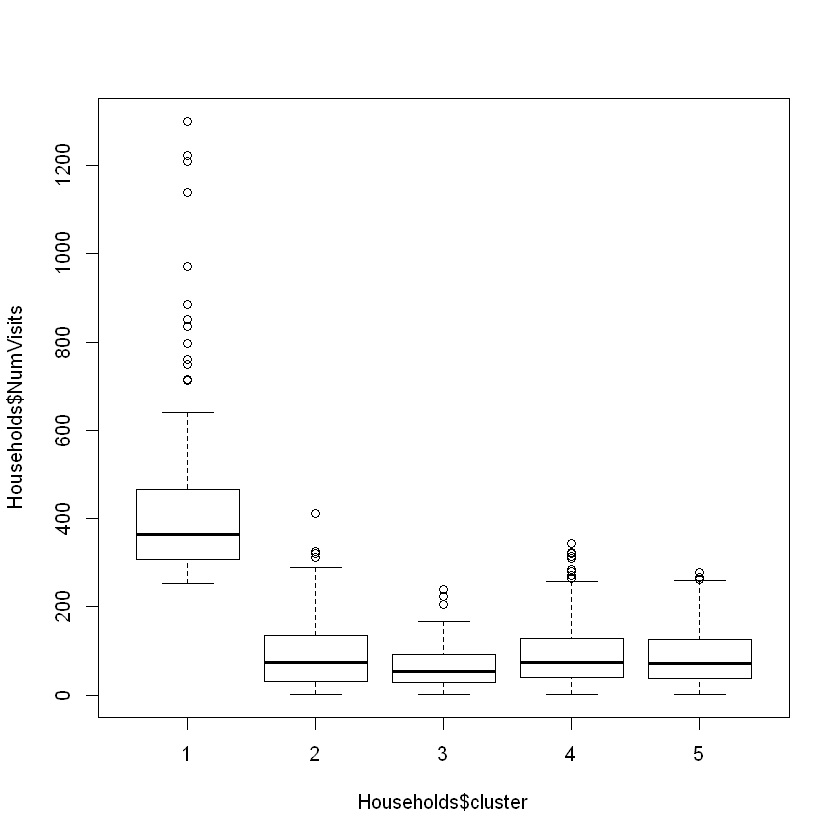

In [30]:
#Households
boxplot(Households$NumVisits ~ Households$cluster)

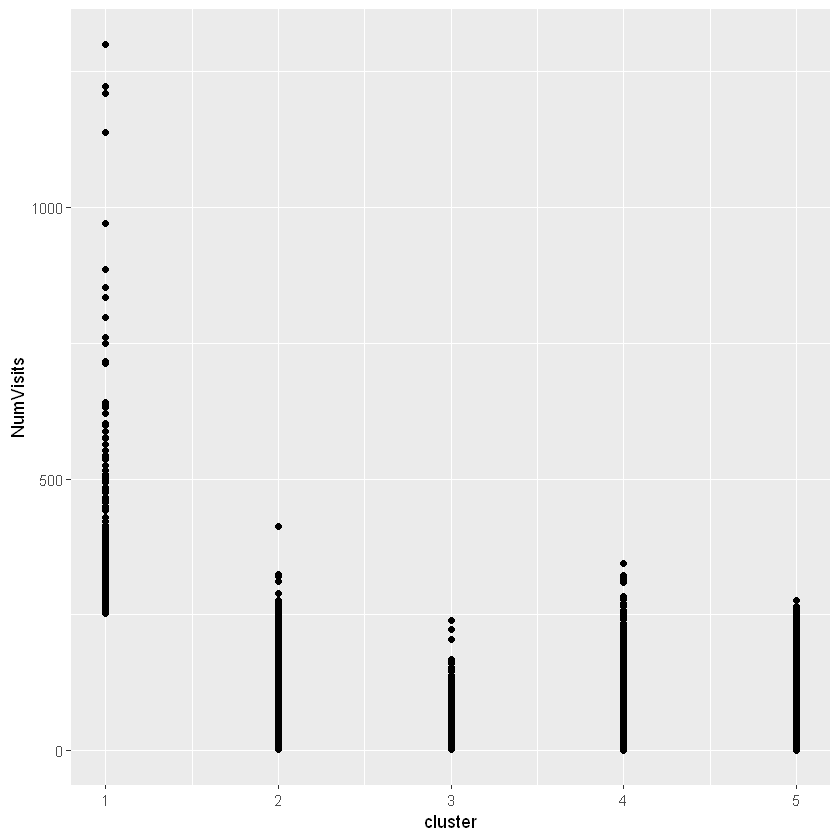

In [31]:
library(ggplot2)
ggplot(Households, aes(x=cluster, y=NumVisits)) + geom_point()